# Bagging, Random Forest y Boosting

## 1. Introducción

En el aprendizaje automático, los métodos de ensamble son técnicas poderosas que combinan múltiples modelos para mejorar la precisión y la robustez de las predicciones. En esta clase, nos enfocaremos en dos de las técnicas de ensamble más comunes: **Bagging** (Bootstrap Aggregating) y **Boosting**. Además, veremos cómo el **Random Forest** se construye a partir del concepto de Bagging aplicado a árboles de decisión.

## 2. Bagging

### 2.1 ¿Qué es Bagging?

**Bagging** es una técnica que mejora la estabilidad y precisión de los algoritmos de aprendizaje de máquina al reducir la variabilidad. Se basa en el uso de muestras bootstrap, donde se generan subconjuntos de datos a partir del conjunto de entrenamiento original mediante muestreo con reemplazo. Cada subconjunto se utiliza para entrenar un modelo individual, y las predicciones finales se obtienen mediante votación (en clasificación) o promediando las salidas (en regresión).

### 2.2 Pasos de Bagging

1. **Generación de Bootstrap Samples**: A partir del conjunto de datos de entrenamiento, se generan múltiples subconjuntos mediante muestreo con reemplazo.
2. **Entrenamiento de Modelos**: Cada subconjunto se utiliza para entrenar un modelo independiente (por ejemplo, un árbol de decisión).
3. **Combinación de Predicciones**: Para la clasificación, las predicciones se combinan utilizando la votación mayoritaria. Para la regresión, se promedian las predicciones.

### 2.3 Ventajas y Desventajas

- **Ventajas**:
  - Reduce el sobreajuste (overfitting) al combinar modelos.
  - Fácil de implementar.
- **Desventajas**:
  - Aumenta el costo computacional.
  - No siempre mejora la precisión.

## 3. Random Forest

### 3.1 ¿Qué es Random Forest?

**Random Forest** es una extensión del Bagging que utiliza árboles de decisión como modelos base. La clave de Random Forest es la introducción de aleatoriedad adicional al seleccionar subconjuntos aleatorios de características en cada división de los árboles.

### 3.2 Funcionamiento de Random Forest

1. **Generación de Subconjuntos de Datos**: Igual que en Bagging, se crean subconjuntos bootstrap del conjunto de datos de entrenamiento.
2. **Selección Aleatoria de Características**: En cada nodo de cada árbol, se selecciona un subconjunto aleatorio de características para determinar la mejor división.
3. **Entrenamiento de Árboles**: Los árboles se entrenan sobre los subconjuntos de datos y características seleccionados.
4. **Combinación de Predicciones**: Al igual que en Bagging, se utiliza la votación mayoritaria o el promedio para obtener la predicción final.

### 3.3 Ventajas y Desventajas

- **Ventajas**:
  - Mejora la precisión en comparación con un solo árbol de decisión.
  - Maneja bien conjuntos de datos con muchas características.
  - Reduce la varianza del modelo.
- **Desventajas**:
  - Menos interpretabilidad debido a la combinación de múltiples árboles.
  - Mayor costo computacional.

## 4. Boosting

### 4.1 ¿Qué es Boosting?

**Boosting** es otra técnica de ensamble, pero a diferencia de Bagging, se enfoca en construir modelos de manera secuencial, donde cada modelo nuevo intenta corregir los errores cometidos por los modelos anteriores. Uno de los algoritmos más conocidos de Boosting es **AdaBoost**.

### 4.2 Funcionamiento de Boosting

1. **Inicialización**: Se asignan pesos iguales a todas las observaciones del conjunto de datos.
2. **Entrenamiento Secuencial**: Se entrena un modelo y se calcula el error de predicción. Los pesos de las observaciones incorrectamente clasificadas se incrementan.
3. **Ajuste de Pesos**: Se entrenan modelos adicionales, donde cada uno se enfoca en corregir los errores de los modelos previos.
4. **Combinación de Modelos**: Las predicciones de los modelos se combinan de manera ponderada para formar la predicción final.

### 4.3 Ventajas y Desventajas

- **Ventajas**:
  - Alta precisión.
  - Eficaz para corregir errores de clasificación.
- **Desventajas**:
  - Sensible al ruido en los datos.
  - Requiere más tiempo de entrenamiento.

## 5. Comparación entre Bagging y Boosting

| **Aspecto**       | **Bagging**                               | **Boosting**                               |
|-------------------|-------------------------------------------|--------------------------------------------|
| **Entrenamiento** | Paralelo, independiente entre modelos     | Secuencial, cada modelo depende del anterior |
| **Enfoque**       | Reduce la varianza                        | Reduce el sesgo                            |
| **Sensibilidad al Ruido** | Menos sensible                      | Más sensible                               |
| **Combinación**   | Votación/Promedio simple                  | Combinación ponderada                      |

## 6. Conclusiones

El uso de métodos de ensamble como Bagging, Random Forest, y Boosting permite construir modelos más robustos y precisos. Mientras que Bagging y Random Forest se enfocan en reducir la varianza y evitar el sobreajuste, Boosting busca mejorar el rendimiento corrigiendo los errores de predicción.


# Voting

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

In [2]:
# Load data.
data = load_breast_cancer()

In [16]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])
variable_names = data['feature_names']

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [17]:
# Split de set de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

## Predicción con indicador individual

In [8]:
# Classification Tree.
DTC = DecisionTreeClassifier(max_depth=10)
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)
print( "Tree accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Tree accuracy : 0.918


In [9]:
# Classification with KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print( "KNN accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

KNN accuracy : 0.936


In [10]:
# Classification with Logistic Regression.
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print( "Logistic regression accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Logistic regression accuracy : 0.918


## Predicción con un método de votos

In [11]:
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='hard', n_jobs=-1)             # voting = 'hard'.
VC.fit(X_train, y_train)
y_pred = VC.predict(X_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Voting Classifier Accuracy : 0.953


In [12]:
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='soft', n_jobs=-1)             # voting = 'soft'.
VC.fit(X_train, y_train)
y_pred = VC.predict(X_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Voting Classifier Accuracy : 0.953


# Bagging

In [13]:
# !pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [14]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

####  Random Forest:

In [18]:
# Classification by Random Forest.
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123, n_jobs= -1)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Random Forest accuracy : 0.924


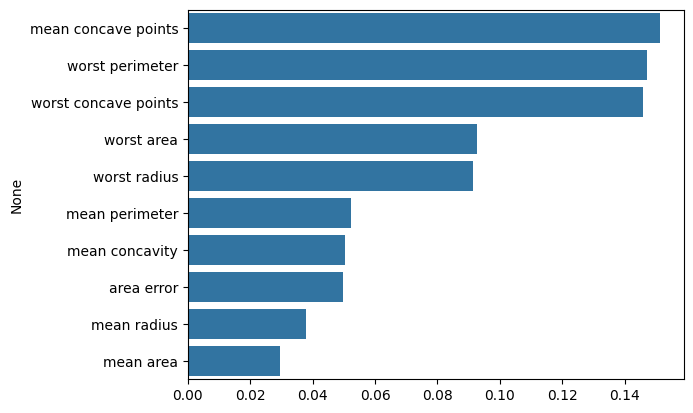

In [19]:
# Display the top 10 most important variables.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

### Boosting Ensemble:

#### AdaBoost:

In [21]:
# Classification by AdaBoost.
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123)
ABC.fit(X_train, y_train)
y_pred = ABC.predict(X_test)
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

AdaBoost accuracy : 0.924


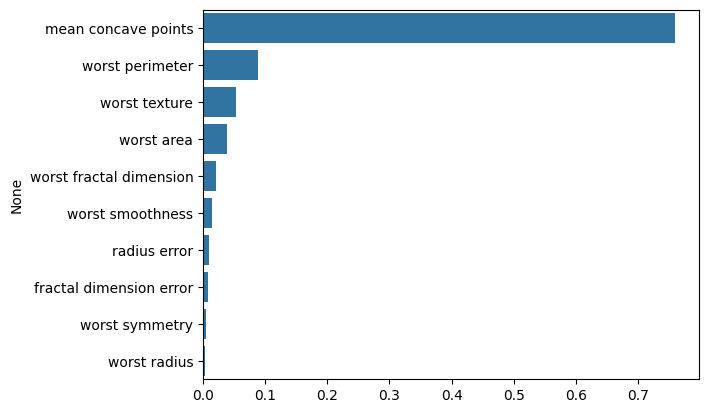

In [22]:
# Display the top 10 most important variables.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### Gradient Boosting:

In [23]:
# Classification by Gradient Boosting.
GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Gradient Boosting accuracy : 0.906


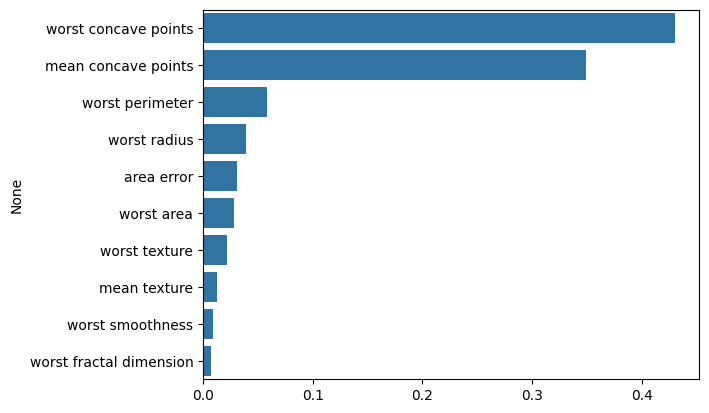

In [24]:
# Display the top 10 most important variables.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### XGBoost:

In [25]:
# Classification by XGBoost.
XGBC = XGBClassifier(n_estimator = 500, learning_Rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, y_train)
y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

XGBoost accuracy : 0.942


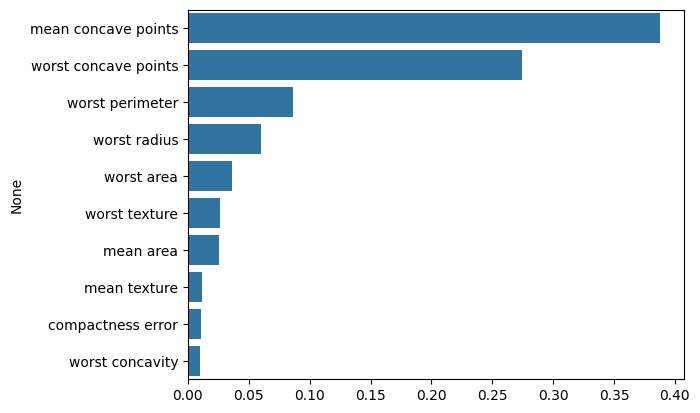

In [26]:
# Display the top 10 most important variables.
variable_importance = pd.Series(XGBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()